In [1]:
import folium as fl
import pandas as pd
import sys
import numpy as np
from folium.plugins import BeautifyIcon
from scipy.io import loadmat
import PIL.Image
import matplotlib.pyplot as plt

# https://leaflet-extras.github.io/leaflet-providers/preview/

#!/usr/bin/env python
# -*- coding: utf-8 -*-
sys.getdefaultencoding()

chosen_stations = ['ANTOKOLSKY', 'HOLON', 'IRONID', 'KVISH4', 'PETAH_TIKVA_ROAD', 'REMEZ',
       'YAD_LEBANIM', 'YEFET_YAFO', 'AHUZA_G', 'ATZMAUT_B', 'KAKAL',
       'KIRYAT_ATA', 'KIRYAT_BIALIK', 'KIRYAT_BINYAMIN', 'KIRYAT_TIVON',
       'NAVE_SHANAAN', 'NESHER', 'BAR_ILAN', 'EFRATA', 'NAVE_ILAN',
       'ASHDOD_IGUD', 'ASHKELON_SOUTH', 'DALYA', 'GEDERA', 'GVARAAM',
       'KIRYAT_MALAHI', 'NIR_ISRAEL', 'ORT', 'ROVA_TV', 'SDEROT', 'SDE_YOAV',
       'YAHALOM', 'BEER_SHEVA', 'EAST_NEGEV', 'KFAR_MASARIK', 'HEFZIBA',
       'PARDES_HANA', 'RAANANA']

# # this is the 33 original stations that were chosen
# stations = pd.read_csv("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stations_info.csv") 
stackLocations = pd.read_pickle('/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stackLocations')

# stations.head(1)

# stackLocations.head(1)

PM25_dict = loadmat('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/LoadDataVar_PM25_2000#2019.mat')

columns = PM25_dict['StNames']

col_list = []
for c in columns:
    col_list.append(c[0][0])
np.shape(col_list)

# all stations
all_StationsInfo = loadmat('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/StationInfo.mat')

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Name')[0][1]

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Long')[0][1]

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Lat')[0][1]

all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==col_list[0])[0][0],[1,6,7]][0][0]

names = []
X = []
Y = []
lats = []
lons = []
region = []
Type = []
HASL = []
HAGL = []
for st in col_list:
    names.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],1][0])
    X.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],4][0][0])
    Y.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],5][0][0])
    lons.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],6][0][0])
    lats.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],7][0][0])
    region.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],2][0])
    Type.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],3][0])
    HASL.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],8][0][0])
    HAGL.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],9][0][0])

all_stations = pd.DataFrame(np.array([names,region,Type,HASL,HAGL,lats,lons,X,Y]).T,columns = ['Name','Region','Type','Height a.s.l [m]','Height a.g.l [m]','Lat','Lon','X','Y'])

all_stations

# all_stations.to_csv('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/allStationsInfo.csv')

all_stations[all_stations.Name=='AFULA']

# tiles: https://leaflet-extras.github.io/leaflet-providers/preview/

m = fl.Map(
#     location = [float(np.min(all_stations.Lat))+0.7,float(np.min(all_stations.Lon))+0.4],
    location = [31.95,34.9],
#     width='25%',
#     height='80%',
    zoom_start=8, 
    control_scale = True,
    fill_opacity=0.9,
    tiles='https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png',
#     tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
#     tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapServer/tile/{z}/{y}/{x}',
    attr=' ') #tiles='stamenterrain'
# m.fit_bounds([(stations.Lat.min(),stations.Lon.min(),stations.Lat.max(),stations.Lon.max())])

all_stations[all_stations.Name == 'PETAH_TIKVA_ROAD']
# all_stations[all_stations.Name == 'REMEZ']

# all stations - blue
for station in all_stations.itertuples():
    if station.Lon=='nan':
        continue
    fl.Marker((station.Lat, station.Lon),popup=station.Name, icon=BeautifyIcon(border_width=3, icon_shape='circle-dot',border_color='blue')).add_to(m)

# chosen_stations
stations = all_stations[all_stations.Name.isin(chosen_stations)]
stations.reset_index(drop=True,inplace=True)

for station in stations.itertuples():
    fl.Marker((station.Lat, station.Lon),popup=station.Name, icon=BeautifyIcon(border_width=3, icon_shape='circle-dot',border_color='red')).add_to(m)

for sn in stackLocations.itertuples():
    fl.Marker((sn.Lat, sn.Lon),popup=sn.stack_name_eng +' '+ str(np.round(sn.mean_hourly_emission_rate,1)),icon=fl.Icon(color='red', icon='info-sign')).add_to(m)


In [2]:
m


In [7]:
stackLocations


,stack_name,X,Y,mean_hourly_emission_rate,Lat,Lon,stack_name_eng
0,"חברת חשמל תחנת הכח אורות רבין, חדרה",189500,708242,159.348170,32.467898,34.885864,IEC Rabin
1,"חברת חשמל תחנת הכח רוטנברג, אשקלון",154634,615702,84.239862,31.631943,34.521239,IEC Rotenberg
2,"חיפה כימיקלים בע""מ",206328,744064,41.394493,32.791237,35.064360,Haifa chemicals
3,"מגנזיום ים המלח בע""מ",234264,548155,40.341861,31.024468,35.359595,Dead-Sea Mg
4,חברת חשמל תחנת הכח חגית,204203,724780,21.457000,32.617325,35.041991,IEC Hagit
5,"רותם אמפרט נגב בע""מ",218600,552500,20.739305,31.063750,35.195538,Rotem
6,חברת חשמל תחנת הכח רמת חובב,182295,562515,15.443104,31.153490,34.814783,IEC Ramat Hovav
7,תנובה מחלבת תל יוסף,237911,717874,9.064428,32.555003,35.401002,Tnuva Tel-Yosef
8,מפעלי ים המלח,235510,549634,10.594090,31.037791,35.372669,Dead-Sea Works
9,"פריקלאס ים המלח בע""מ",218443,551243,10.357284,31.052413,35.193894,Periclase Dead Sea


In [64]:
stations.loc[stations['Region'].isin(['GUD']),'Region']='Gush Dan'
stations.loc[stations['Region'].isin(['HAI']),'Region']='Haifa'
stations.loc[stations['Region'].isin(['JER']),'Region']='Jerusalem'
stations.loc[stations['Region'].isin(['MHD']),'Region']='Southern coastal plain'
stations.loc[stations['Region'].isin(['NGV']),'Region']='Negev'
stations.loc[stations['Region'].isin(['NOR']),'Region']='North'
stations.loc[stations['Region'].isin(['SHC']),'Region']='Sharon coastal plain'


stations.loc[stations['Type'].isin(['Gener']),'Type']='General'
stations.loc[stations['Type'].isin(['Trans']),'Type']='Transportation'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [15]:
d = dict(selector="th",
    props=[('text-align', 'center')])


stations.style.set_precision(1).set_properties(**{'width':'11em', 'text-align':'center'})\
        .set_table_styles([d])  

,Name,Region,Type,Height a.s.l [m],Height a.g.l [m],Lat,Lon
0,ANTOKOLSKY,Gush Dan,General,19,12,32.084283,34.782699
1,HOLON,Gush Dan,General,24,15.8,32.018216,34.768924
2,IRONID,Gush Dan,Transportation,12,3.8,32.093806,34.790918
3,KVISH4,Gush Dan,Transportation,50,3.8,32.071229,34.842215
4,PETAH_TIKVA_ROAD,Gush Dan,General,28,22,32.062234,34.777346
5,REMEZ,Gush Dan,Transportation,19,3.8,32.092159,34.826857
6,YAD_LEBANIM,Gush Dan,General,77,17.799999,32.075956,34.821512
7,YEFET_YAFO,Gush Dan,Transportation,25,3.8,32.049749,34.752818
8,AHUZA_G,Haifa,General,280,22,32.78604,34.986144
9,ATZMAUT_B,Haifa,Transportation,13,3.8,32.817076,35.002364


In [16]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40406f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

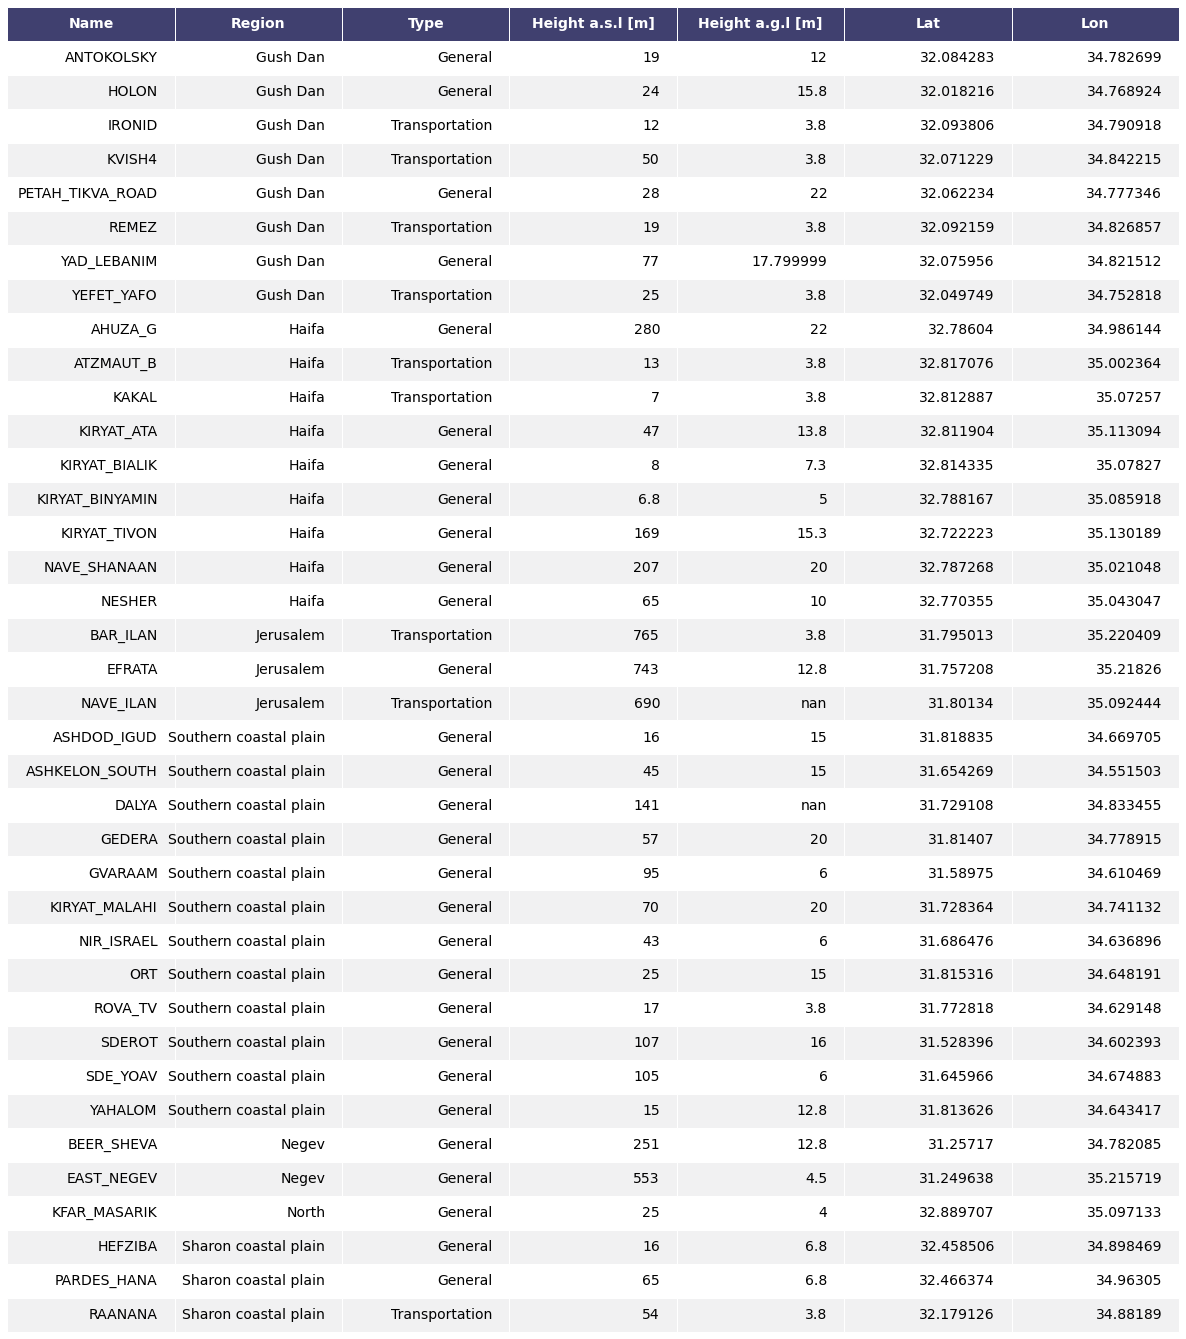

In [17]:
fig,ax = render_mpl_table(stations, header_columns=0, col_width=3)
# fig.savefig("/Users/iditbela/Documents/Broday/Broday_proposals/figures/stations_table.png")

In [62]:
# import selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

# binary = FirefoxBinary('path/to/installed firefox binary')
# browser = webdriver.Firefox(firefox_binary=binary)
# browser = webdriver.Firefox()

In [62]:
# img_data = m._to_png(10)
# img = Image.open(io.BytesIO(img_data))
# img.save('image.png')

In [222]:
# YAD_LABANIM was removed
# stations